In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


**importing libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [3]:
!pip install pyecharts

     |████████████████████████████████| 135 kB 881 kB/s eta 0:00:01


**data analyze**

In [5]:
def ReadData(year):
    return pd.read_csv(f"/kaggle/input/world-happiness/{year}.csv")

In [6]:
df2015 = ReadData(2015)
df2016 = ReadData(2016)
df2017 = ReadData(2017)
df2018 = ReadData(2018)
df2019 = ReadData(2019)

In [7]:
datasets =(("2015",df2015),("2016",df2016),("2017",df2017),("2018",df2018),("2019",df2019))
for year,data in datasets:
    print(f"shape of the {year} data: {data.shape}\n")

shape of the 2015 data: (158, 12)

shape of the 2016 data: (157, 13)

shape of the 2017 data: (155, 12)

shape of the 2018 data: (156, 9)

shape of the 2019 data: (156, 9)



In [8]:
#check nan values
for year,data in datasets:
    print(f"Nan values in {year}:\n{data.isna().sum()}\n")

Nan values in 2015:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Nan values in 2016:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Nan values in 2017:
Country                          0
Ha

In [10]:
# we have null values in 2018 data
#we're going to drop that
df2018.dropna(axis=0,inplace=True)

**data marge**

In [11]:
#Now we can merge the data on Country columns to make easier to analyze. In order to see which feature belongs to which country, I will add a suffix at the end of the features that says which year it belongs to.
df2015.columns = df2015.columns.map(lambda x: str(x) + '_2015')
df2016.columns = df2016.columns.map(lambda x: str(x) + '_2016')
df2017.columns = df2017.columns.map(lambda x: str(x) + '_2017')
df2018.columns = df2018.columns.map(lambda x: str(x) + '_2018')
df2019.columns = df2019.columns.map(lambda x: str(x) + '_2019')

In [12]:
df= df2015.merge(df2016,how ="inner", left_on ="Country_2015",right_on ="Country_2016")
df = df.merge(df2017, how = "left", left_on = "Country_2015", right_on = "Country_2017")
df = df.merge(df2018, how = "left", left_on = "Country_2015", right_on = "Country or region_2018")
df = df.merge(df2019, how = "left", left_on = "Country_2015",right_on = "Country or region_2019")

In [15]:
df.drop(['Country_2016','Region_2016','Country_2017','Country or region_2018','Country or region_2019'],axis =1, inplace=True)

In [16]:
df.isna().sum()

Country_2015                          0
Region_2015                           0
Happiness Rank_2015                   0
Happiness Score_2015                  0
Standard Error_2015                   0
Economy (GDP per Capita)_2015         0
Family_2015                           0
Health (Life Expectancy)_2015         0
Freedom_2015                          0
Trust (Government Corruption)_2015    0
Generosity_2015                       0
Dystopia Residual_2015                0
Happiness Rank_2016                   0
Happiness Score_2016                  0
Lower Confidence Interval_2016        0
Upper Confidence Interval_2016        0
Economy (GDP per Capita)_2016         0
Family_2016                           0
Health (Life Expectancy)_2016         0
Freedom_2016                          0
Trust (Government Corruption)_2016    0
Generosity_2016                       0
Dystopia Residual_2016                0
Happiness.Rank_2017                   5
Happiness.Score_2017                  5


In [17]:
df.dropna(axis = 0, inplace = True)

In [18]:
df.isna().sum()

Country_2015                          0
Region_2015                           0
Happiness Rank_2015                   0
Happiness Score_2015                  0
Standard Error_2015                   0
Economy (GDP per Capita)_2015         0
Family_2015                           0
Health (Life Expectancy)_2015         0
Freedom_2015                          0
Trust (Government Corruption)_2015    0
Generosity_2015                       0
Dystopia Residual_2015                0
Happiness Rank_2016                   0
Happiness Score_2016                  0
Lower Confidence Interval_2016        0
Upper Confidence Interval_2016        0
Economy (GDP per Capita)_2016         0
Family_2016                           0
Health (Life Expectancy)_2016         0
Freedom_2016                          0
Trust (Government Corruption)_2016    0
Generosity_2016                       0
Dystopia Residual_2016                0
Happiness.Rank_2017                   0
Happiness.Score_2017                  0


**Happiness Score vs Year by Country**

In this section, first I created a sub-data to look at the change in happiness scores over the years. For this sub data, I concatenate the score values of the years in the table. Then I melted the dataset by years.

In [21]:
sub_data = pd.concat([df["Country_2015"],df["Happiness Score_2015"],df["Happiness Score_2016"],df["Happiness.Score_2017"], df["Score_2018"] ,df["Score_2019"]], axis = 1)

In [23]:
sub_data = pd.melt(sub_data,id_vars = ["Country_2015"], value_vars = ["Happiness Score_2015","Happiness Score_2016","Happiness.Score_2017","Score_2018","Score_2019"], var_name = "Years",value_name = "Happiness Score")

Since the year column names appear as rows when I melt, I edited and replaced the column name with the year corresponding to each column name. Then I used the lineplot function in Seaborn library and made a graphic that shows us each years happiness scores by country.

In [24]:
sub_data["Years"][sub_data["Years"]== "Happiness Score_2015"]=2015
sub_data["Years"][sub_data["Years"]== "Happiness Score_2016"]=2016
sub_data["Years"][sub_data["Years"]== "Happiness Score_2017"]=2017
sub_data["Years"][sub_data["Years"] == "Score_2018"] = 2018
sub_data["Years"][sub_data["Years"] == "Score_2019"] = 2019


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

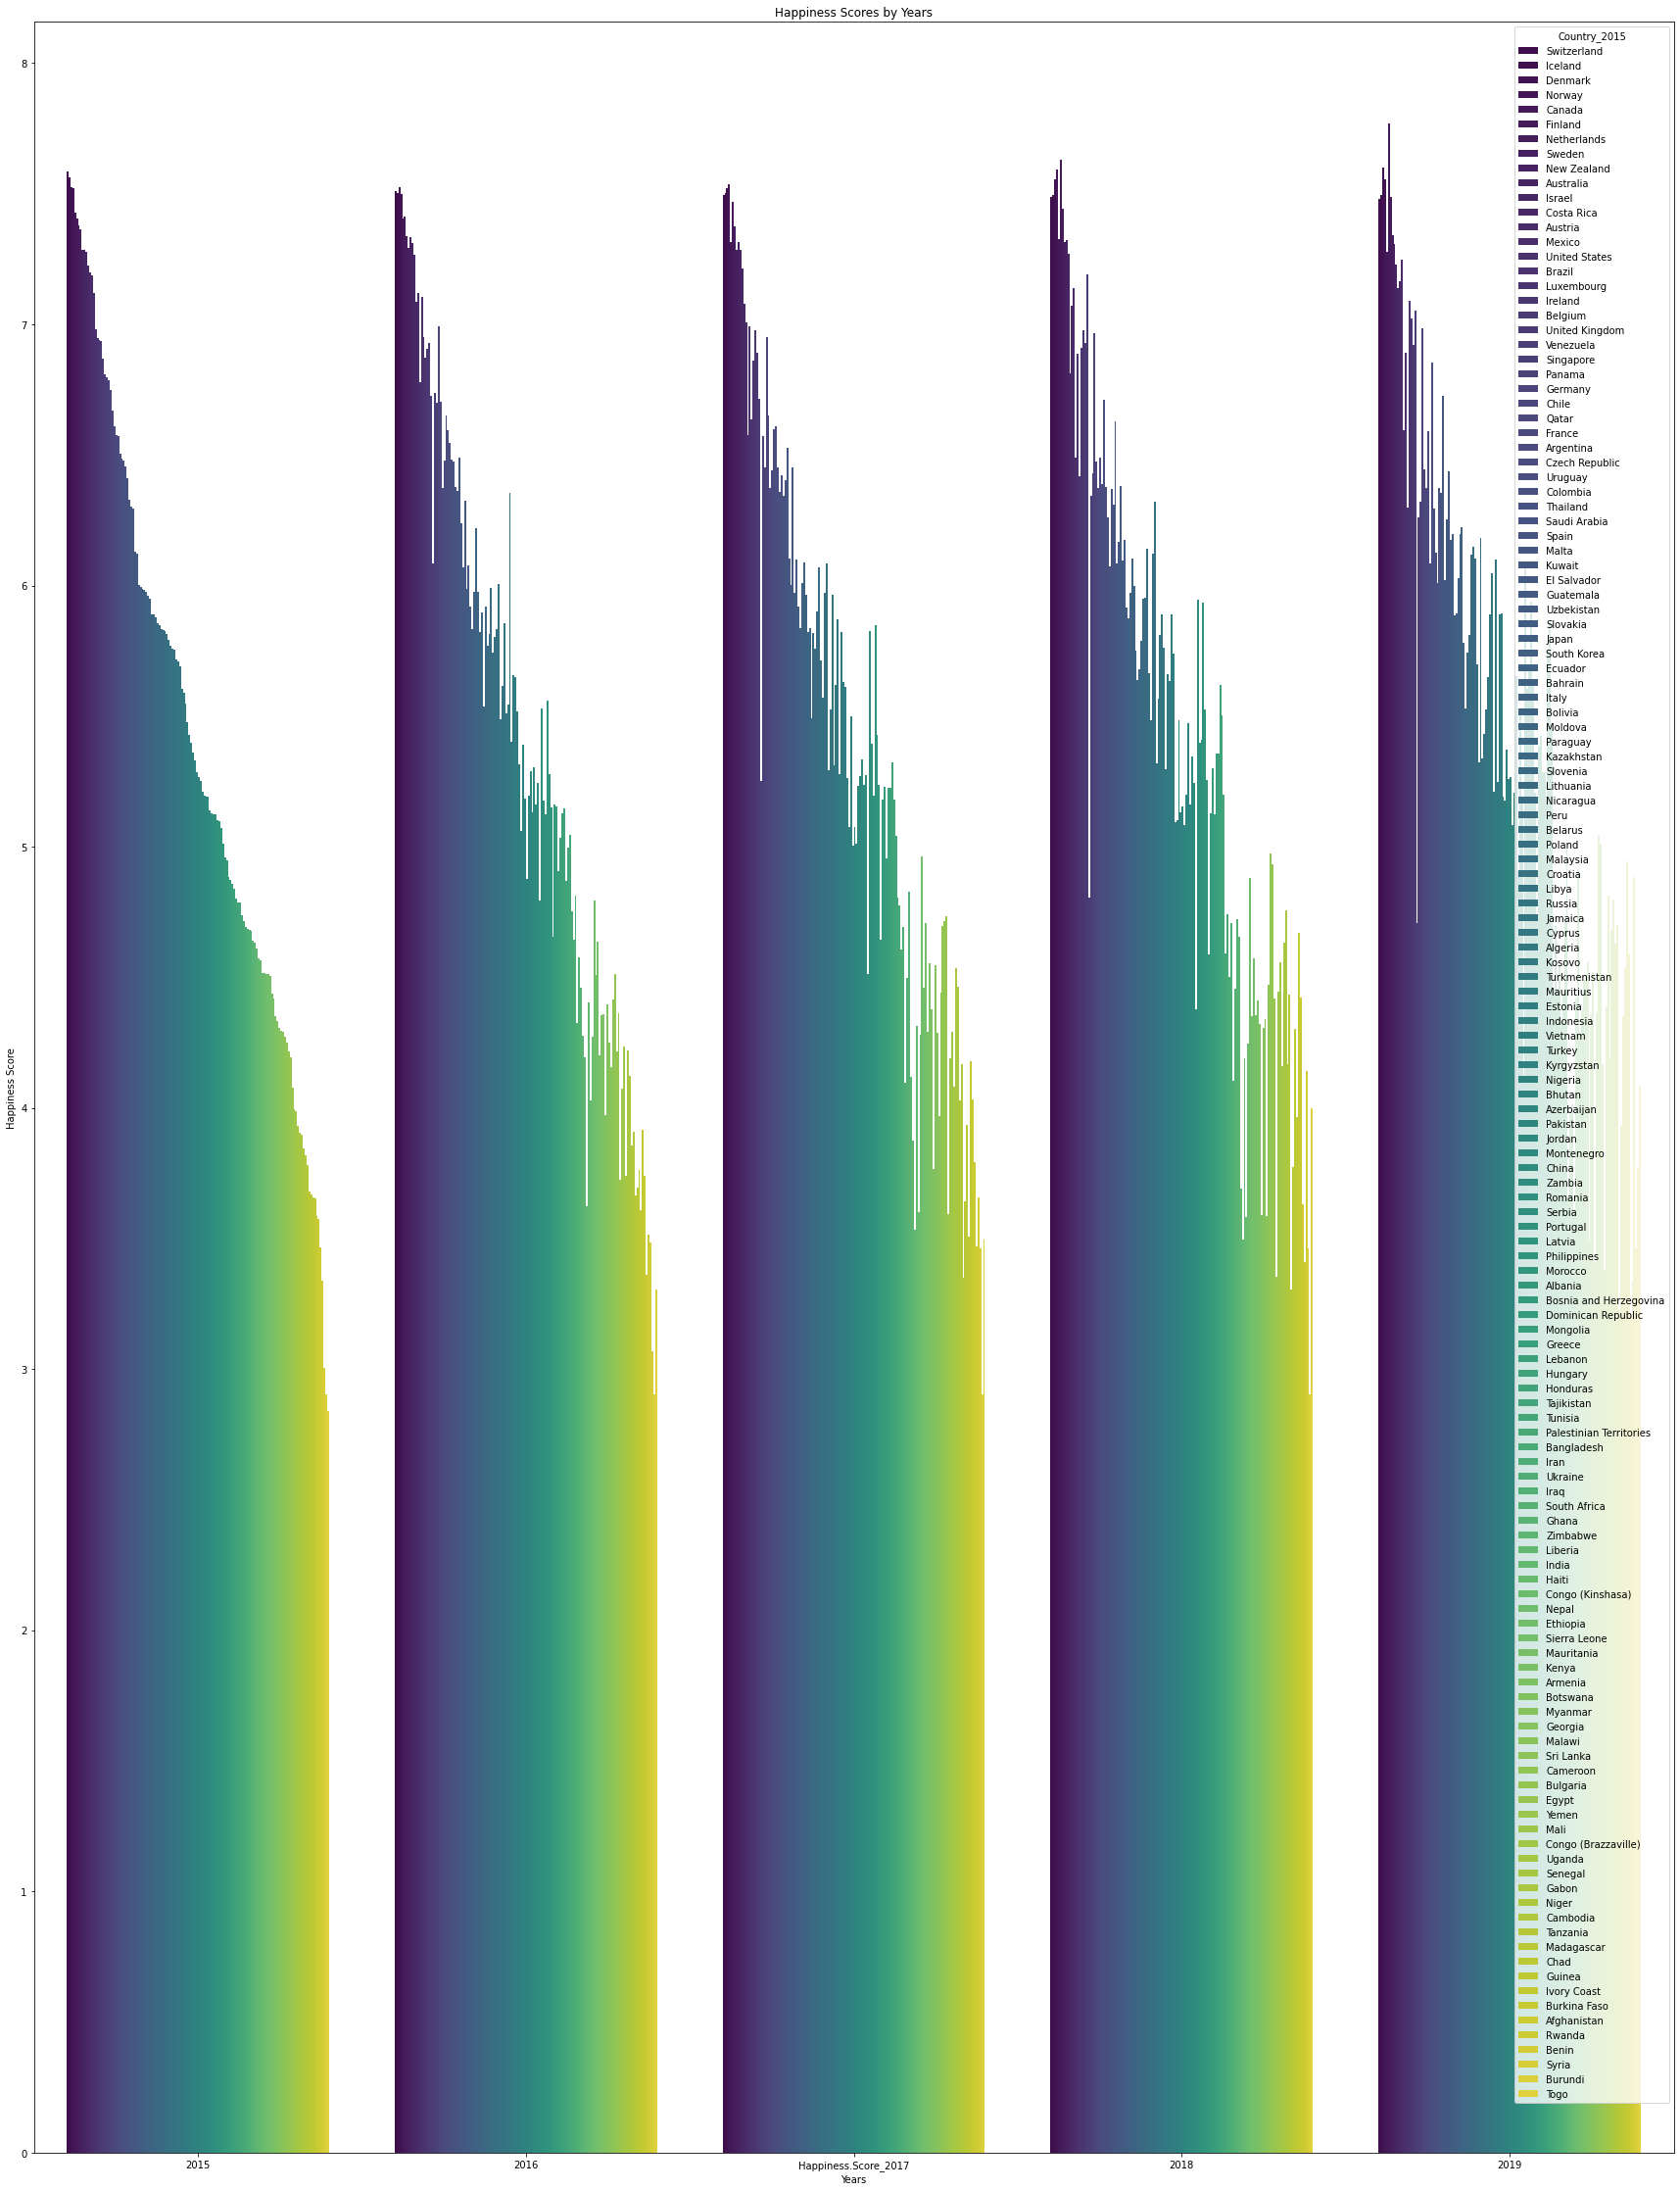

In [27]:
plt.figure(figsize = (30,40))
sns.barplot(x = "Years",y= "Happiness Score", data = sub_data, hue = "Country_2015", palette = "viridis")
plt.xlabel("Years")
plt.ylabel("Happiness Score")
plt.title("Happiness Scores by Years")
plt.show()

**Economy vs Year by Countries**

In [28]:
df_economy = pd.concat([df["Economy (GDP per Capita)_2015"],df["Economy (GDP per Capita)_2016"],df["Economy..GDP.per.Capita._2017"],df["GDP per capita_2018"], df["GDP per capita_2019"] ,df["Country_2015"]], axis = 1)

In [29]:
df_economy = pd.melt(df_economy,id_vars = ["Country_2015"], value_vars = ["Economy (GDP per Capita)_2015","Economy (GDP per Capita)_2016","Economy..GDP.per.Capita._2017","GDP per capita_2018","GDP per capita_2019"], var_name = "Years",value_name = "Economy(GDP per Capita)")

In [30]:
df_economy["Years"][df_economy["Years"] == "Economy (GDP per Capita)_2015"] = 2015
df_economy["Years"][df_economy["Years"] == "Economy (GDP per Capita)_2016"] = 2016
df_economy["Years"][df_economy["Years"] == "Economy..GDP.per.Capita._2017"] = 2017
df_economy["Years"][df_economy["Years"] == "GDP per capita_2018"] = 2018
df_economy["Years"][df_economy["Years"] == "GDP per capita_2019"] = 2019

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

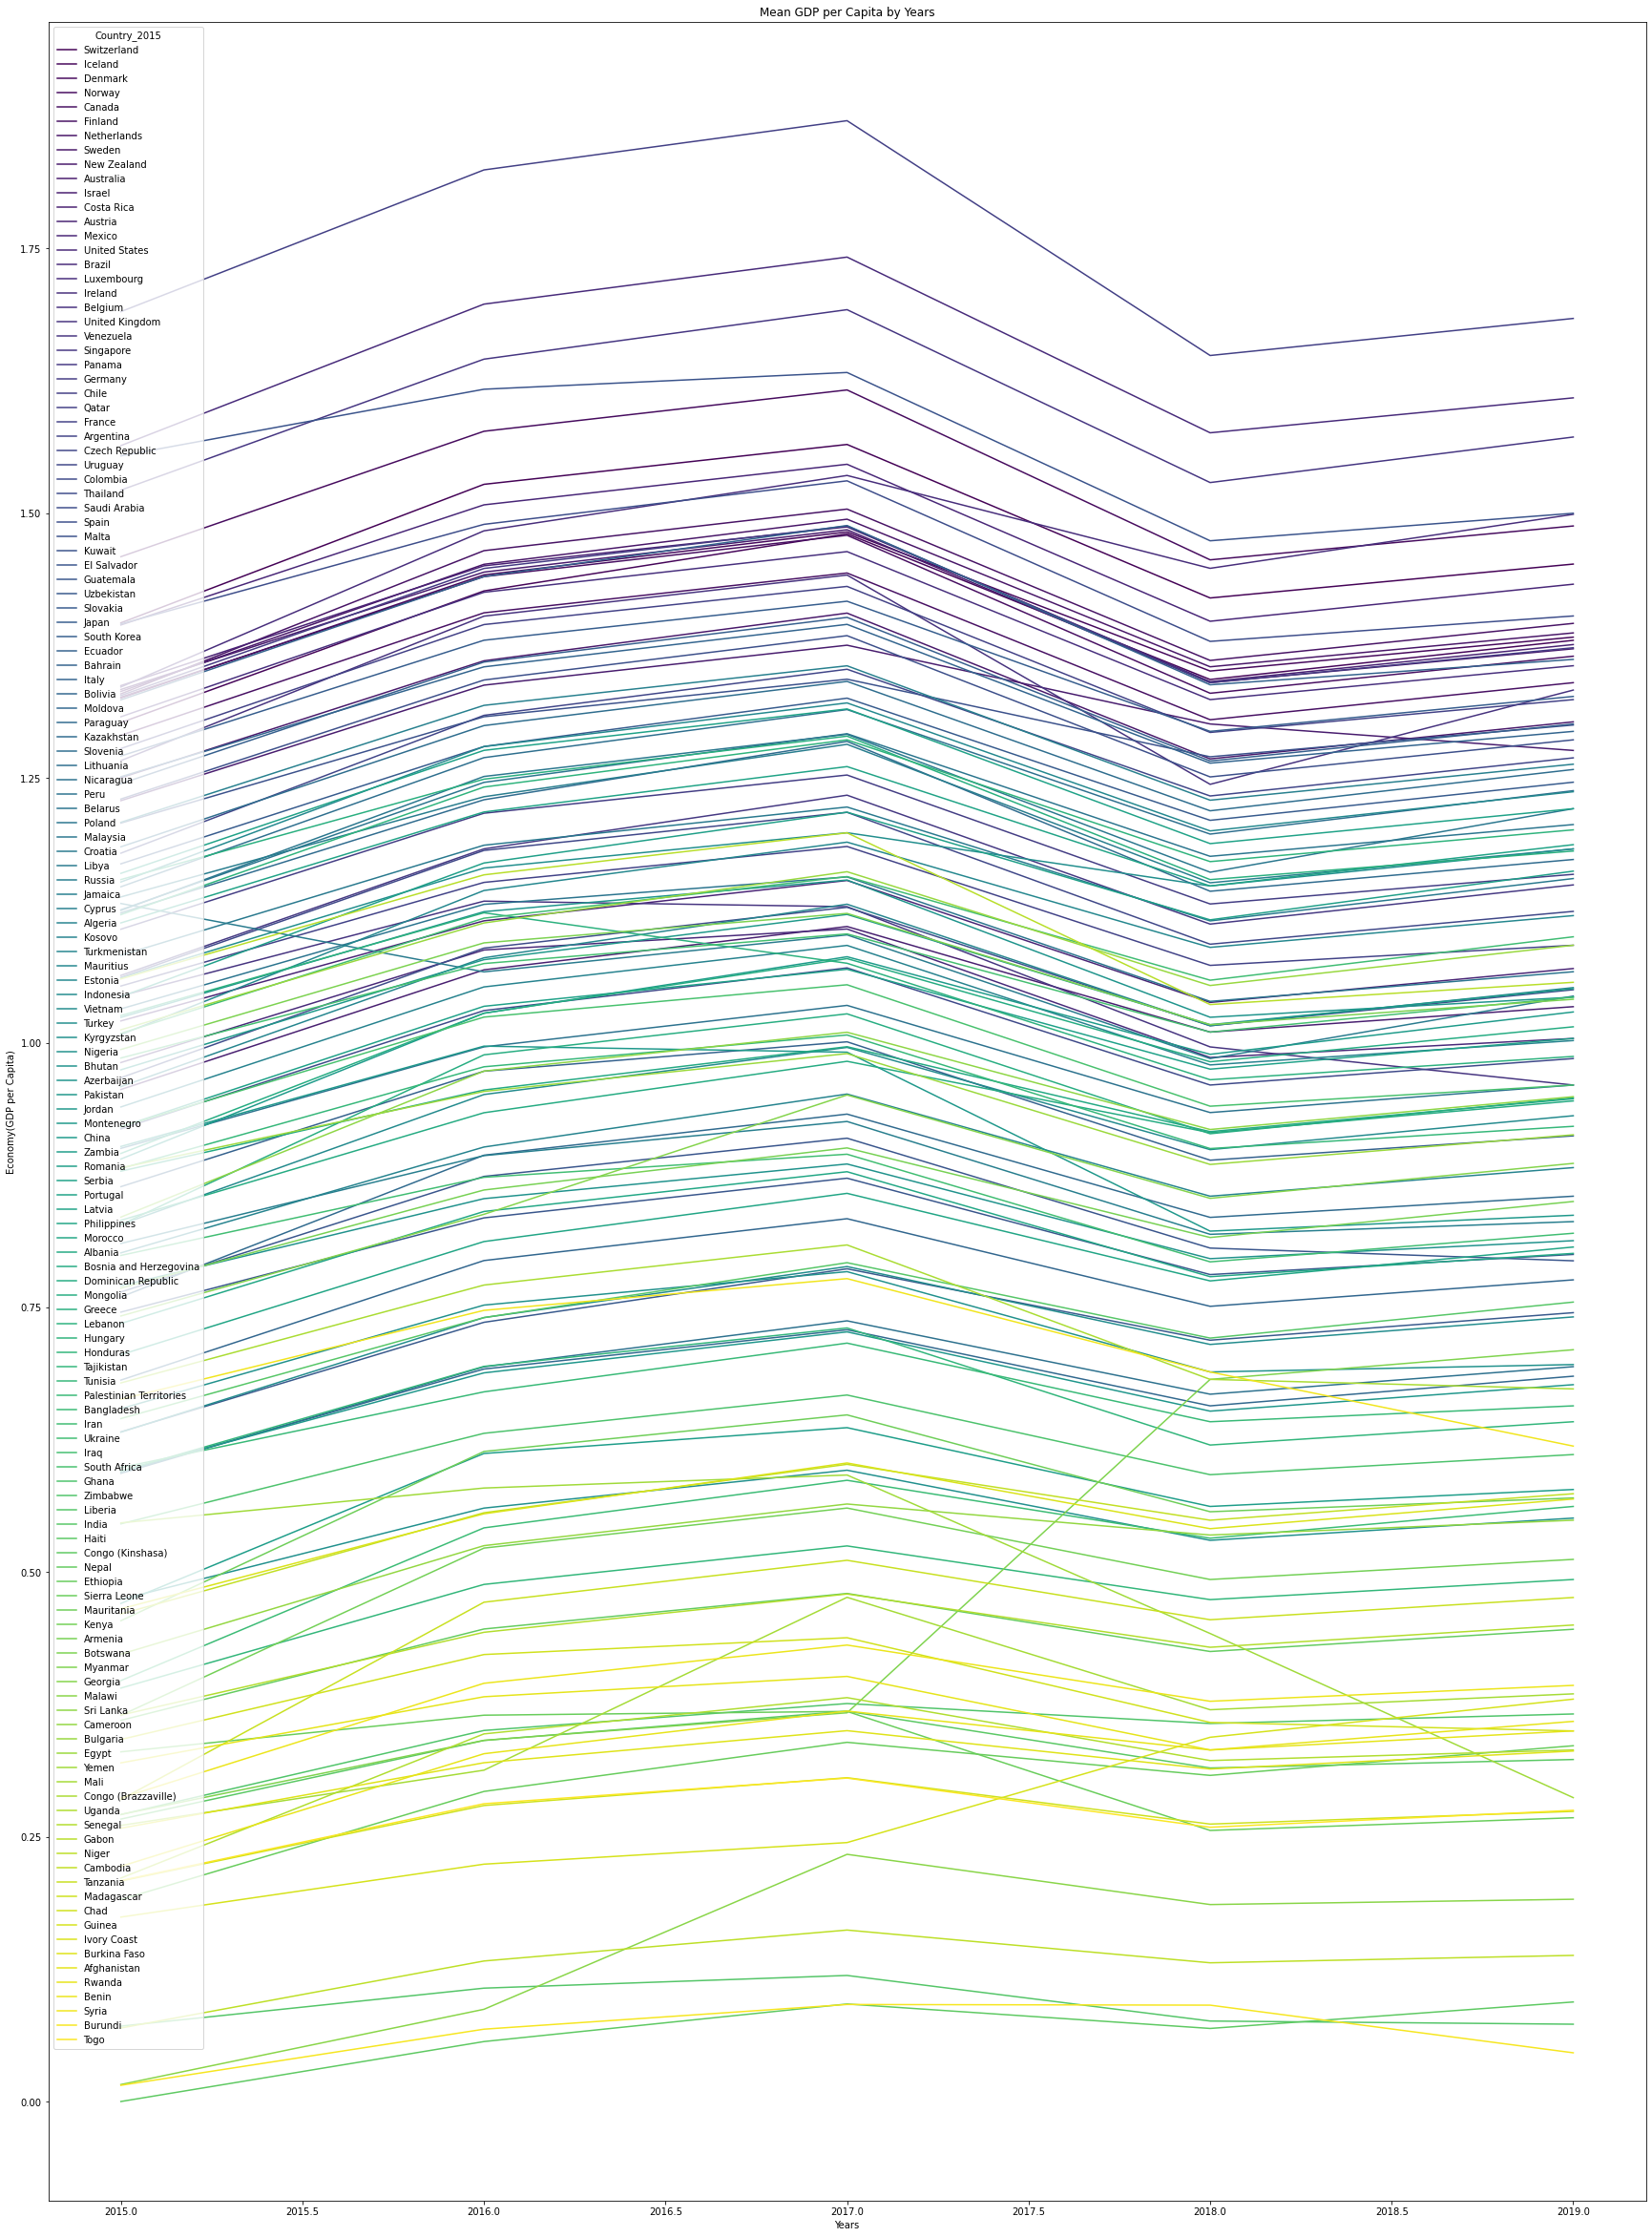

In [31]:
plt.figure(figsize = (30,42))
sns.lineplot(x= "Years", y="Economy(GDP per Capita)",
             data= df_economy,hue="Country_2015", palette = "viridis")
plt.xlabel("Years")
plt.ylabel("Economy(GDP per Capita)")
plt.title("Mean GDP per Capita by Years")
plt.show()

**Happiness Scores Top and Bottom Countries In 2019**

In [32]:
#I found the highest scoring and lowest scoring countries according to the scores of the countries and compared some fetaurs. These characteristics were health, freedom, and social support scores. The reason I looked at these was because I wanted to see if these traits affect the happiness score.
sub_data = df[["Country_2015","Score_2019","Freedom to make life choices_2019","Healthy life expectancy_2019","Social support_2019"]]

While doing this, I first determined the countries I wanted by using the nlargest() and nsmallest() functions. The reason I don't use the max() and min() functions is because they only return a number as output. In these functions, we can directly see the data with the values we want.

In [33]:
df_largest_score = sub_data.nlargest(5,"Score_2019")
df_lowest_score = sub_data.nsmallest(5,"Score_2019")

In [34]:
df_largest_score = df_largest_score.drop(["Score_2019"], axis = 1)

In [35]:
df_largest_score = pd.melt(df_largest_score,id_vars= ['Country_2015'] ,value_vars=["Freedom to make life choices_2019","Healthy life expectancy_2019","Social support_2019"])
df_largest_score = df_largest_score.reset_index()

In [36]:
df_lowest_score = df_lowest_score.drop(["Score_2019"], axis = 1)


In [37]:
df_lowest_score = pd.melt(df_lowest_score,id_vars= ['Country_2015'] ,value_vars=["Freedom to make life choices_2019","Healthy life expectancy_2019","Social support_2019"])
df_lowest_score = df_lowest_score.reset_index()

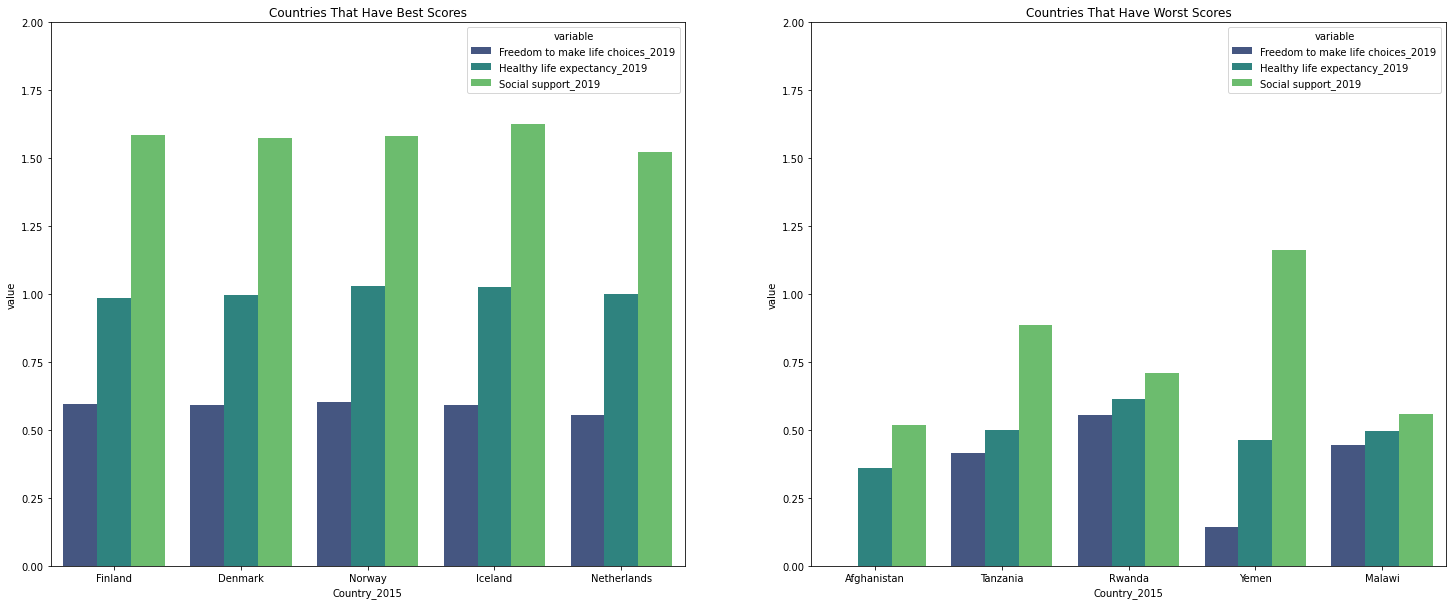

In [38]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.ylim((0,2))
sns.barplot(x='Country_2015', y='value', hue='variable', data=df_largest_score ,palette = 'viridis')
plt.title("Countries That Have Best Scores")



plt.subplot(1,2,2)
plt.ylim((0,2))
sns.barplot(x='Country_2015', y='value', hue='variable', data= df_lowest_score,palette = 'viridis')
plt.title("Countries That Have Worst Scores")
plt.show()

Countries With the Highest Increase and Decrease**Countries With the Highest Increase and Decrease**

In this part, I first wanted to look at the changes in the happiness score of countries from 2015 to 2019. So I added a feature that gives the score differences to the data by creating a for loop. After that, I got the countries with the highest increase and the highest decrease. Then I visualized it using barplot.

In [41]:
df["Score_difference"] = 0
for i in range(len(df)):
    df["Score_difference"].iloc[i] = df["Score_2019"].iloc[i] - df["Happiness Score_2015"].iloc[i] 


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
score_difference_top5 = df.nlargest(5,"Score_difference")
score_difference_bottom5 = df.nsmallest(5,"Score_difference")

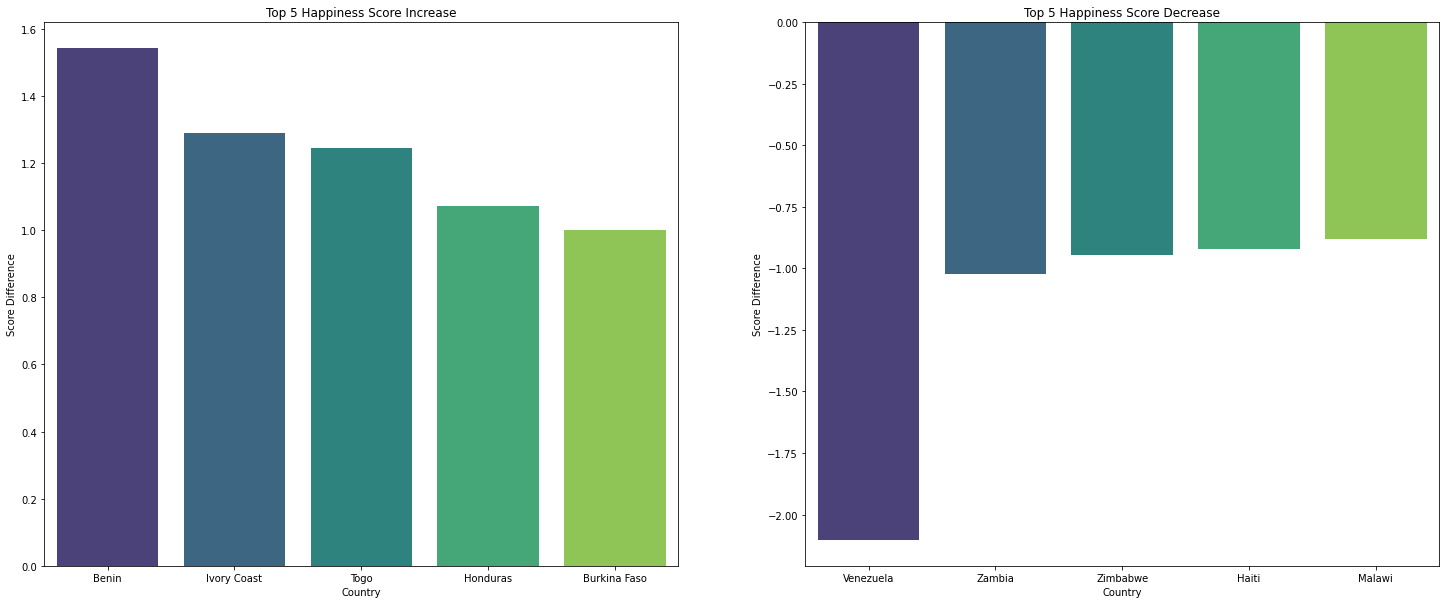

In [43]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
sns.barplot(x = "Country_2015", y = "Score_difference", data = score_difference_top5, palette = "viridis")
plt.ylabel("Score Difference")
plt.xlabel("Country")
plt.title("Top 5 Happiness Score Increase")

plt.subplot(1,2,2)
sns.barplot(x = "Country_2015", y = "Score_difference", data = score_difference_bottom5, palette = "viridis")
plt.ylabel("Score Difference")
plt.xlabel("Country")
plt.title("Top 5 Happiness Score Decrease")
plt.show()

**Happiness Score Difference By Countries**

In [44]:
score_data = pd.concat([df["Country_2015"],df["Happiness Score_2015"],df["Happiness Score_2016"],df["Happiness.Score_2017"], df["Score_2018"] ,df["Score_2019"]], axis = 1)
score_data["Score_difference"] = 0
for i in range(len(sub_data)):
    score_data["Score_difference"].iloc[i] = score_data["Score_2019"].iloc[i] - score_data["Happiness Score_2015"].iloc[i] 

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
scoresGroupByCountry = score_data.groupby(["Country_2015","Score_difference"]).sum().reset_index()
country = list(scoresGroupByCountry["Country_2015"])
diff = list(scoresGroupByCountry["Score_difference"])
list1 = [[country[i],diff[i]] for i in range(scoresGroupByCountry.shape[0])] 
map_1 = Map(init_opts=opts.InitOpts(width='1000px', height='460px',theme=ThemeType.ROMANTIC)) 
map_1.add('Rank Difference', 
 list1, 
 maptype='world',
 is_map_symbol_show=False) 
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) 
map_1.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=611,is_piecewise=True,pieces=[
 {"max": -3},
 {"max": -2, "max":-1},
 {"max": -1, "max": 0},
 {"max": 0, "max": 1},
 {"max": 1, "max": 2},
 {"max": 2, "max": 3}]),
  title_opts=opts.TitleOpts(
 title='Happiness Score Difference By Countries',
 pos_left='center',
 padding=0,
 item_gap=2,
 title_textstyle_opts= opts.TextStyleOpts(color='Black',
 font_weight='bold',
 font_family='Courier New',
 font_size=30), 
 subtitle_textstyle_opts= opts.TextStyleOpts(color='grey',
 font_weight='bold',
 font_family='Courier New',
 font_size=13)), 
 legend_opts=opts.LegendOpts(is_show=False))
map_1.render_notebook()